In [1]:
import pandas as pd
import numpy as np
import os
import sys
import talib
import mplfinance as mplf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
from scripts.utils import data_loader
from scripts.quantitative import technicalIndicators

In [4]:
aapl = data_loader(os.path.dirname(os.getcwd()) + "\\data\\AAPL_historical_data.csv")
amzn = data_loader(os.path.dirname(os.getcwd()) + "\\data\\AMZN_historical_data.csv")
goog = data_loader(os.path.dirname(os.getcwd()) + "\\data\\GOOG_historical_data.csv")
meta = data_loader(os.path.dirname(os.getcwd()) + "\\data\\META_historical_data.csv")
msft = data_loader(os.path.dirname(os.getcwd()) + "\\data\\MSFT_historical_data.csv")
nvda = data_loader(os.path.dirname(os.getcwd()) + "\\data\\NVDA_historical_data.csv")
tsla = data_loader(os.path.dirname(os.getcwd()) + "\\data\\TSLA_historical_data.csv")

In [5]:
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [6]:
aapl.shape

(10998, 9)

In [7]:
indicators = technicalIndicators()

In [8]:
for counter, df in enumerate([aapl,amzn,goog,meta,msft,nvda,tsla]):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    indicators.simple_moving_avarage(df)
    indicators.exponential_moving_average(df)
    indicators.bollinger_band(df)
    indicators.ma_convergence_divergence(df)
    indicators.relative_strength_index(df)
    indicators.avg_true_range(df)
    if counter ==0:
        df['ticker'] = ['aapl' for i in range(df.shape[0])]
    elif counter == 1:
        df['ticker'] = ['amzn' for i in range(df.shape[0])]
    elif counter == 2:
        df['ticker'] = ['goog' for i in range(df.shape[0])]
    elif counter == 3:
        df['ticker'] = ['meta' for i in range(df.shape[0])]
    elif counter == 4:
        df['ticker'] = ['msft' for i in range(df.shape[0])]
    elif counter == 5:
        df['ticker'] = ['nvda' for i in range(df.shape[0])]
    else:
        df['ticker'] = ['tsla' for i in range(df.shape[0])]




In [9]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'UpperBB', 'MiddleBB',
       'LowerBB', 'MACD', 'MACDSignal', 'MACDHist', 'RSI', 'ATR', 'ticker'],
      dtype='object')

In [10]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6846 entries, 1997-05-15 to 2024-07-30
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6846 non-null   float64
 1   High          6846 non-null   float64
 2   Low           6846 non-null   float64
 3   Close         6846 non-null   float64
 4   Adj Close     6846 non-null   float64
 5   Volume        6846 non-null   int64  
 6   Dividends     6846 non-null   float64
 7   Stock Splits  6846 non-null   float64
 8   SMA20         6827 non-null   float64
 9   SMA50         6797 non-null   float64
 10  EMA20         6827 non-null   float64
 11  UpperBB       6827 non-null   float64
 12  MiddleBB      6827 non-null   float64
 13  LowerBB       6827 non-null   float64
 14  MACD          6813 non-null   float64
 15  MACDSignal    6813 non-null   float64
 16  MACDHist      6813 non-null   float64
 17  RSI           6832 non-null   float64
 18  ATR       

In [11]:
combined_df = pd.concat([aapl,amzn,goog,meta,msft,nvda,tsla])

In [12]:
combined_df.shape

(45428, 20)

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45428 entries, 1980-12-12 to 2024-07-30
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          45428 non-null  float64
 1   High          45428 non-null  float64
 2   Low           45428 non-null  float64
 3   Close         45428 non-null  float64
 4   Adj Close     45428 non-null  float64
 5   Volume        45428 non-null  int64  
 6   Dividends     45428 non-null  float64
 7   Stock Splits  45428 non-null  float64
 8   SMA20         45295 non-null  float64
 9   SMA50         45085 non-null  float64
 10  EMA20         45295 non-null  float64
 11  UpperBB       45295 non-null  float64
 12  MiddleBB      45295 non-null  float64
 13  LowerBB       45295 non-null  float64
 14  MACD          45197 non-null  float64
 15  MACDSignal    45197 non-null  float64
 16  MACDHist      45197 non-null  float64
 17  RSI           45330 non-null  float64
 18  ATR      

In [14]:
combined_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA20,SMA50,EMA20,UpperBB,MiddleBB,LowerBB,MACD,MACDSignal,MACDHist,RSI,ATR,ticker
Date,,,,,,,,,,,,,,,,,,,,
2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,202.1838,233.501099,280.774991,237.924999,195.075007,11.789291,15.873789,-4.084498,44.886918,13.716958,tsla
2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,203.1510,232.239089,278.457743,239.118999,199.780256,9.353206,14.569672,-5.216466,46.951389,13.452174,tsla
2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,203.9960,231.054414,275.866801,240.238000,204.609199,7.302106,13.116159,-5.814053,46.752165,12.987733,tsla
2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,205.1582,231.153995,272.150106,241.949000,211.747894,6.593101,11.811547,-5.218447,52.664511,13.093610,tsla
2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,242.587000,206.1138,230.341233,270.502227,242.587000,214.671772,5.206237,10.490485,-5.284248,48.220474,13.044781,tsla


c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


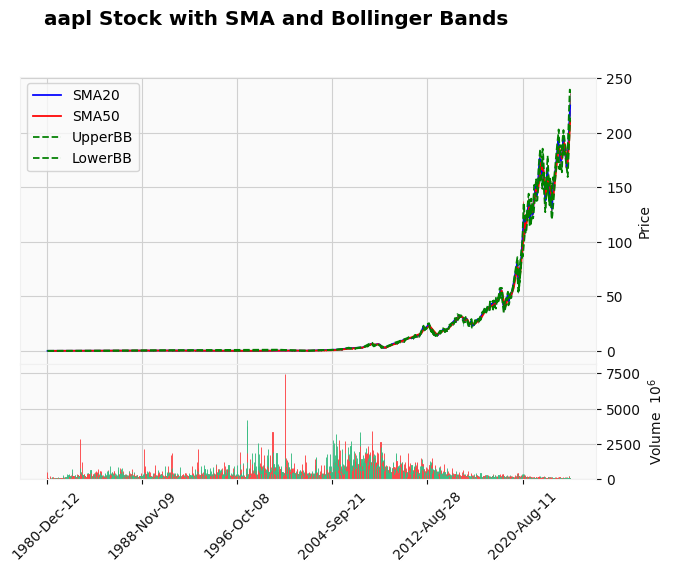

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


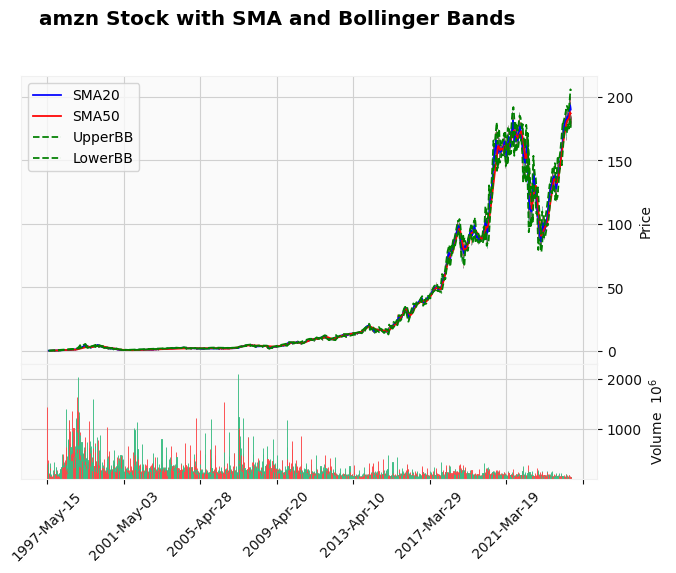

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


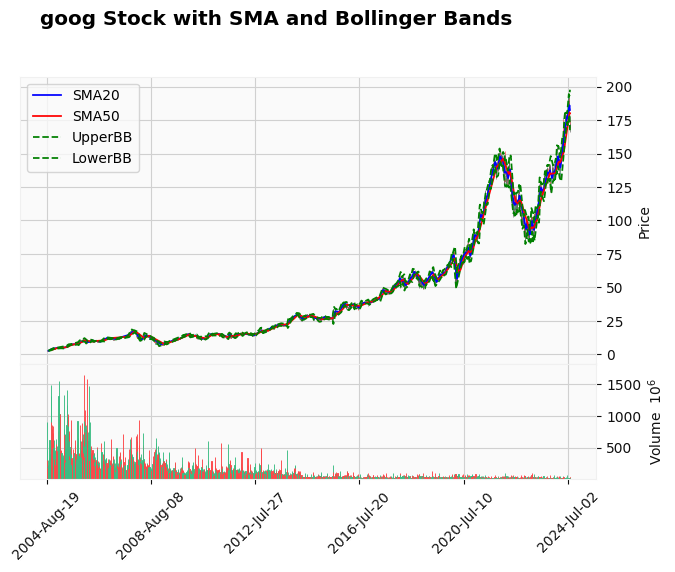

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


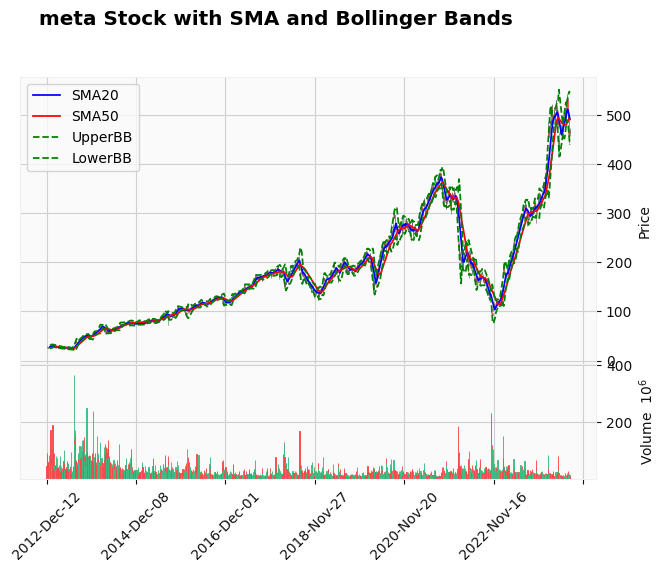

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


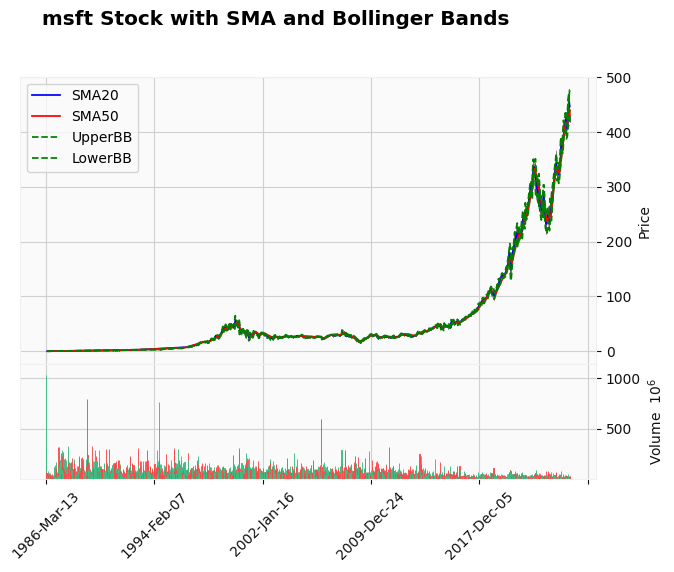

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


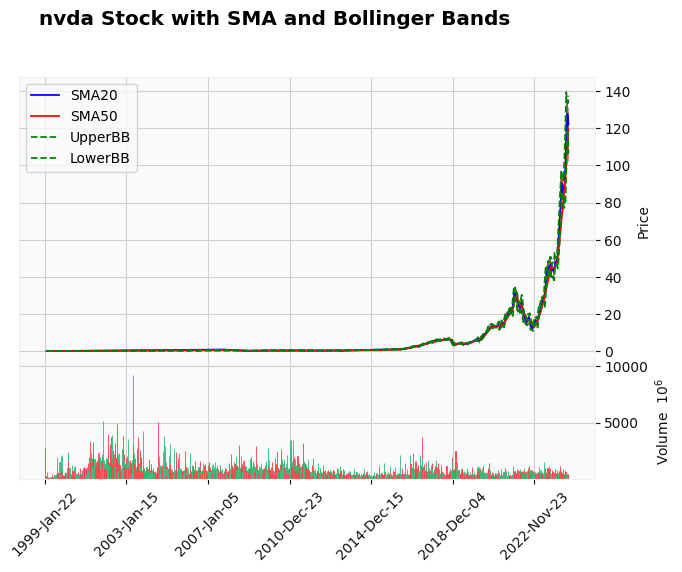

c:\Users\esk\anaconda3\envs\KAIM_week1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


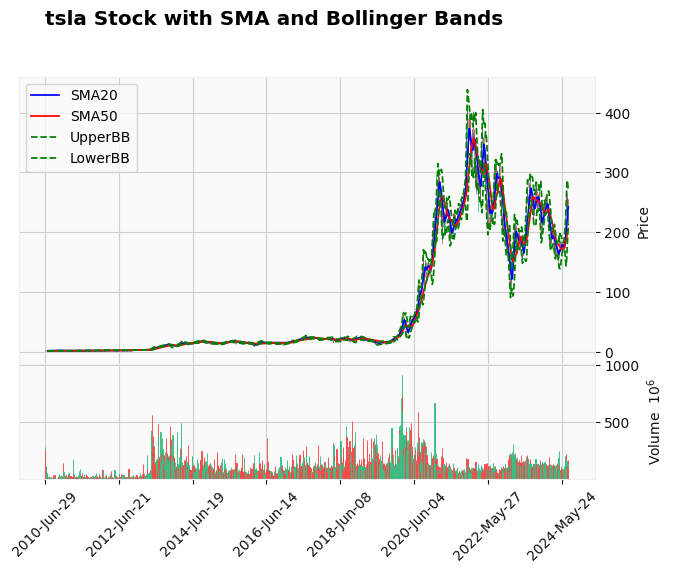

In [15]:
ticker = ['aapl','amzn','goog','meta','msft','nvda','tsla']
for i in ticker:
    tmp =combined_df[combined_df['ticker'] == i]
    mplf.plot(
        tmp,
        type='candle',
        volume=True,
        addplot=[
            mplf.make_addplot(tmp['SMA20'], color='blue', label='SMA20'),
            mplf.make_addplot(tmp['SMA50'], color='red', label='SMA50'),
            mplf.make_addplot(tmp['UpperBB'], color='green', linestyle='--', label='UpperBB'),
            mplf.make_addplot(tmp['LowerBB'], color='green', linestyle='--', label='LowerBB'),
            ],
        title= i + ' Stock with SMA and Bollinger Bands',
        style='yahoo'
    )

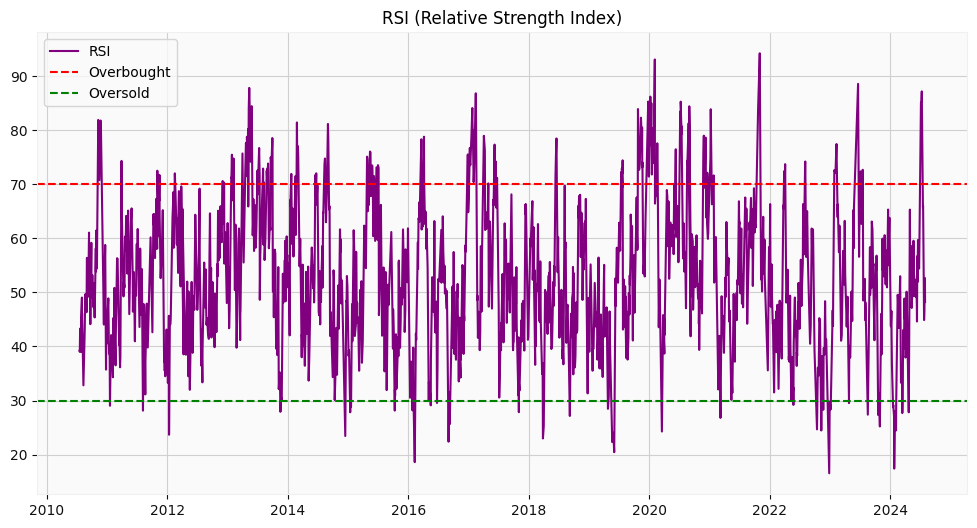

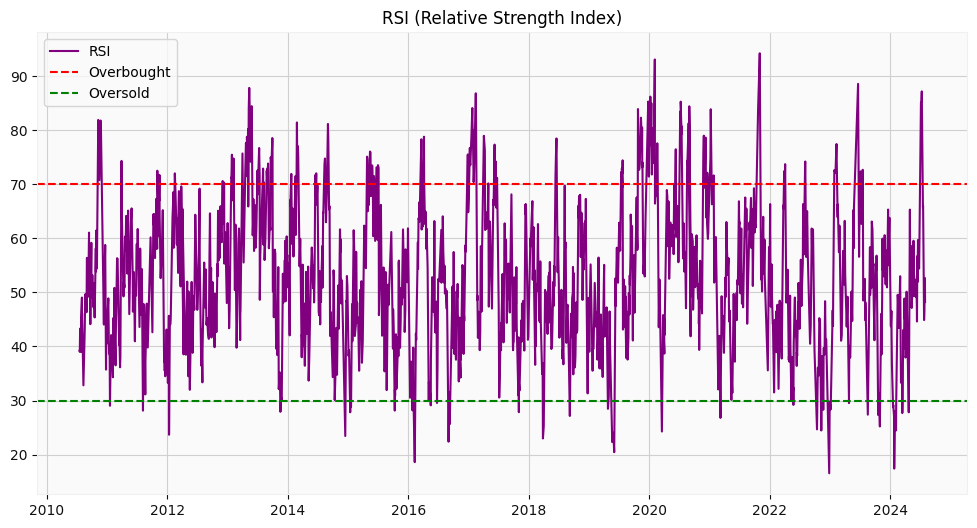

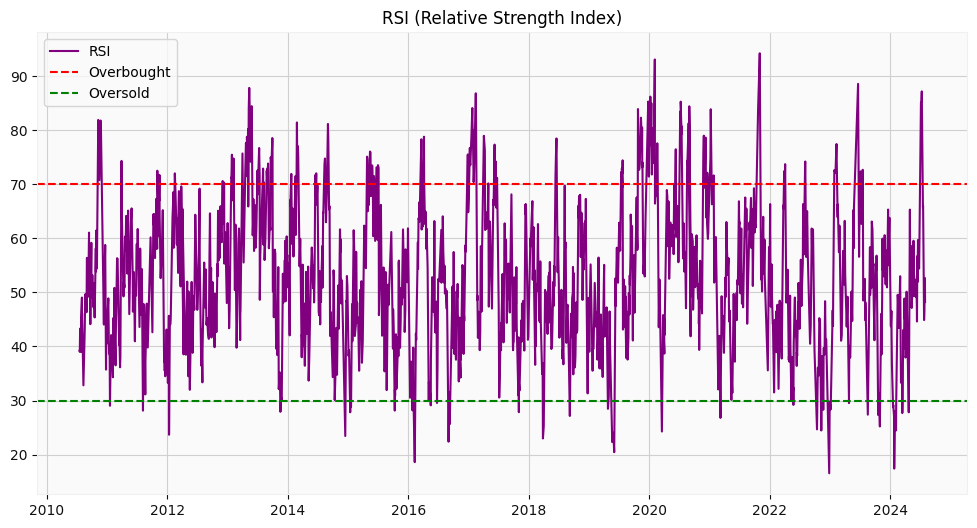

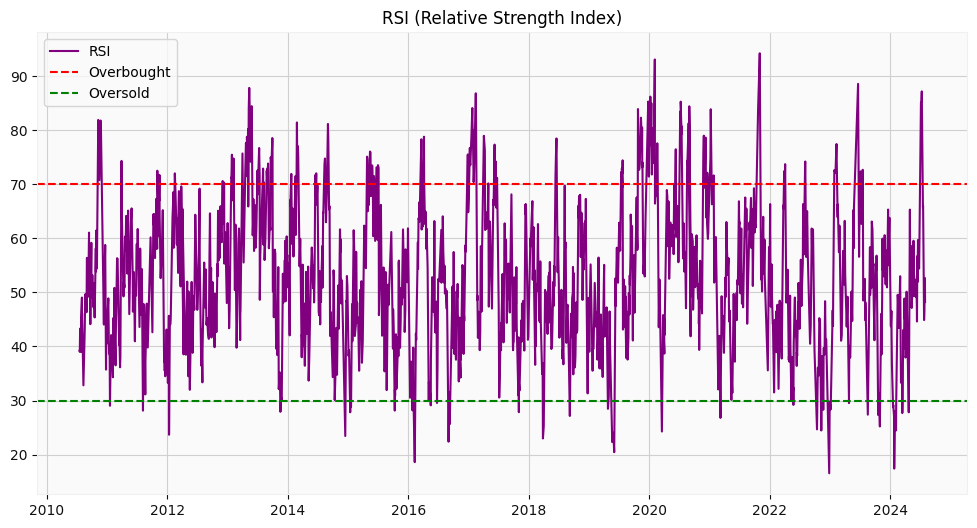

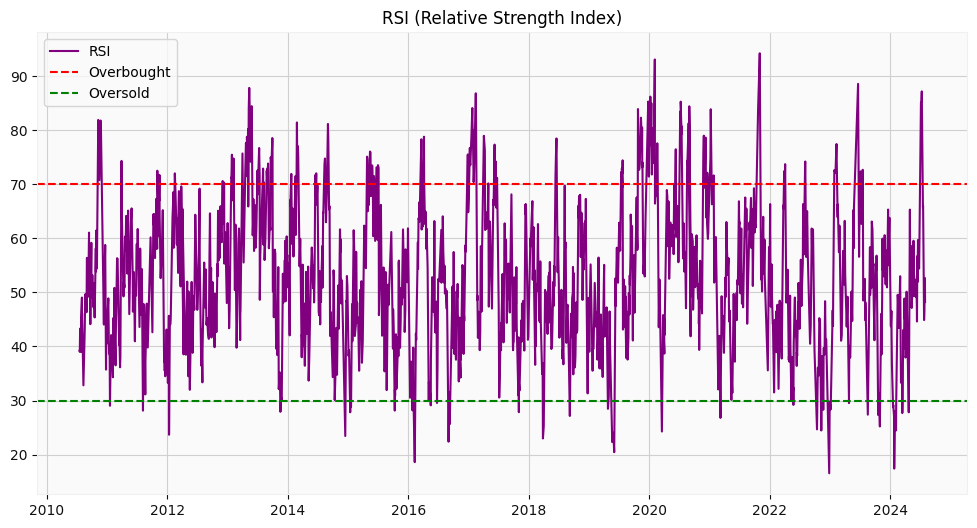

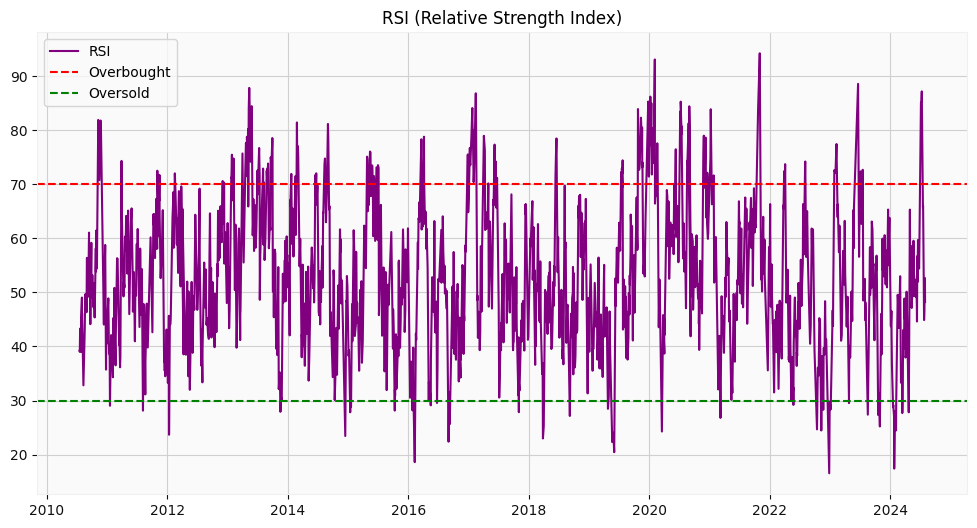

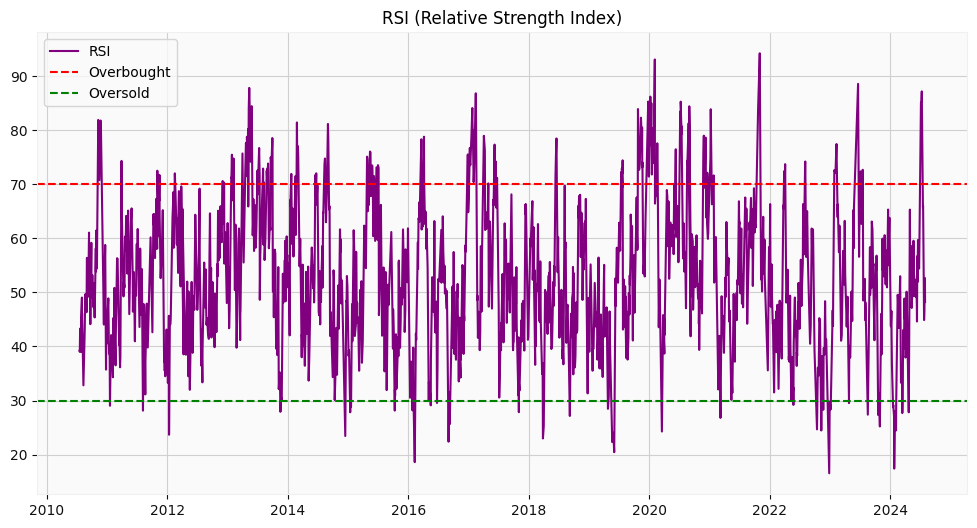

In [ ]:
#Relative Index Visualization for 
for j in ticker:
    tmp = combined_df[combined_df['ticker']== i]
    plt.figure(figsize=(12, 6))
    plt.plot(tmp['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title('RSI (Relative Strength Index)')
    plt.legend()
    plt.show()
